In [52]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from satdb import DBConfig, Dbase, TLE
from datetime import datetime, timedelta

from skyfield.api import load, wgs84
from skyfield.api import EarthSatellite

import numpy as np

In [53]:
## Config file
config_file = "../satdb.yaml"

## Define the matplotlib figure size
plt.rcParams["figure.figsize"] = (10,7)

## NASA JPL general-purpose ephemeris files
## See: https://rhodesmill.org/skyfield/planets.html#planets-and-their-moons-jpl-ephemeris-files
eph_file="../data/de440s.bsp"

## Earth radius [km]
mrad = 6378.137

In [54]:
config = DBConfig(config_file)
dbc = Dbase(config)
dbc.connect()

In [59]:
norad="42831" # Flying Laptop
#norad="36411" # GOES 15
tle=TLE()
tle.fromdb(dbc, norad, datetime(2021,6,1,0,0,0))

In [60]:
ts = load.timescale()
satellite = EarthSatellite(tle.line1, tle.line2, tle.line0, ts)

In [65]:
t = ts.utc(2021, 6, 1, 0, range(0, 6*60, 1))
geocentric = satellite.at(t)

# See if satellite is in sunlight
eph = load(eph_file)
sunlit = geocentric.is_sunlit(eph)
sunlit = ['.' if i==False else 'o' for i in sunlit]

<IPython.core.display.Javascript object>


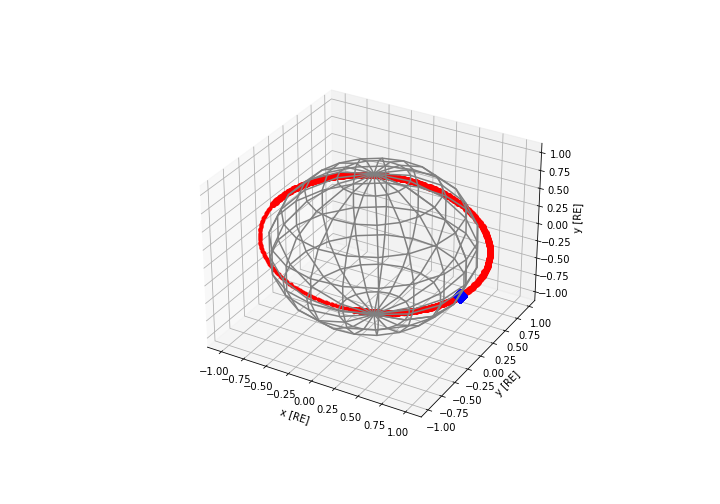

Text(0.5, 0, 'y [RE]')

In [66]:
orbit3d = plt.figure()
ax = orbit3d.add_subplot(projection='3d')
#ax.set_zlim([-6, 6])
for i in range(0, len(t)):
    ax.plot(geocentric.position.km[0][i]/mrad,
            geocentric.position.km[1][i]/mrad,
            geocentric.position.km[2][i]/mrad,
            marker=sunlit[i], color='Red')
    ax.plot(geocentric.position.km[0][-1:]/mrad,
            geocentric.position.km[1][-1:]/mrad,
            geocentric.position.km[2][-1:]/mrad,
            marker='D', markersize=10, color='Blue',)

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="Grey")

ax.set_xlabel('x [RE]')
ax.set_ylabel('y [RE]')
ax.set_zlabel('y [RE]')

In [67]:
subpoints = wgs84.subpoint(geocentric)

eph = load(eph_file)
sunlit = satellite.at(t).is_sunlit(eph)
sunlit = ['.' if i==False else 'o' for i in sunlit]

<IPython.core.display.Javascript object>


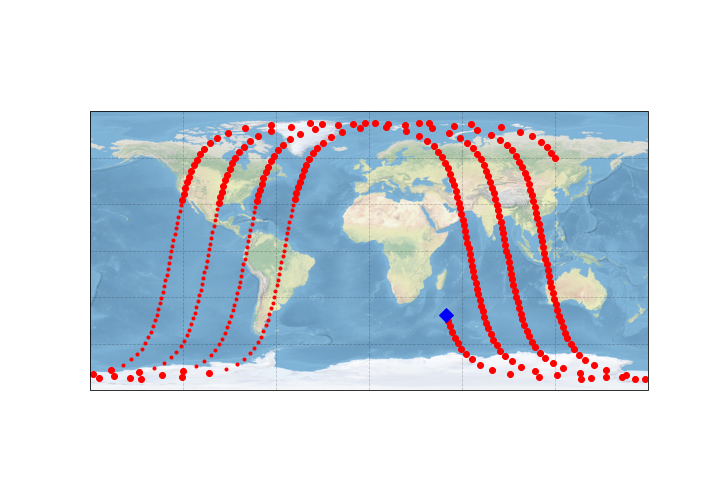

In [71]:
subsat = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.2, linestyle='--')
ax.stock_img()

for i in range(0, len(t)):
    ax.plot(
        subpoints.longitude.degrees[i],
        subpoints.latitude.degrees[i],
        transform=ccrs.PlateCarree(),
        marker=sunlit[i], color='Red'
    )
ax.plot(
    subpoints.longitude.degrees[-1],
    subpoints.latitude.degrees[-1],
    transform=ccrs.PlateCarree(),
    marker='D', markersize=10, color='Blue'
)
